<a href="https://colab.research.google.com/github/Nivedha-5/Artificial-Human-and-Customer-Feedback-Segmentation-Apps/blob/main/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customers Segmentation :
             To find the customers who are loyal to us!


Exploring and Processing the Data

In [ ]:
#Import necessary libraries for our program
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style()
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving Customers_Reviews_Segmentation.csv to Customers_Reviews_Segmentation.csv
User uploaded file "Customers_Reviews_Segmentation.csv" with length 87518 bytes


In [ ]:
Rtl_data = pd.read_csv('Customers_Reviews_Segmentation.csv', encoding = 'unicode_escape')
Rtl_data.head()

,Invoice_No,Stock_Code,Description,Quantity,Date,Price,Customers_Id,Country,Gender
0,552820,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,11-05-2011 12:53,0.83,16644,United Kingdom,M
1,552820,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,11-05-2011 12:53,0.65,16644,United Kingdom,M
2,552820,22917,HERB MARKER ROSEMARY,12,11-05-2011 12:53,0.65,16644,United Kingdom,M
3,552820,22916,HERB MARKER THYME,12,11-05-2011 12:53,0.65,16644,United Kingdom,F
4,552820,22921,HERB MARKER CHIVES,12,11-05-2011 12:53,0.65,16644,United Kingdom,F


In [ ]:
#Shape(rows and columns size) in datasets
Rtl_data.shape

(999, 9)

In [ ]:
country_cust_data=Rtl_data[['Country','Customers_Id']].drop_duplicates()
country_cust_data.groupby(['Country'])['Customers_Id'].aggregate('count').reset_index().sort_values('Customers_Id', ascending=False)

,Country,Customers_Id
3,United Kingdom,40
0,France,2
1,Germany,1
2,Netherlands,1


In [ ]:
Rtl_data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [ ]:
#Missing values in the dataset
Rtl_data.isnull().sum(axis=0)

Invoice_No      0
Stock_Code      0
Description     0
Quantity        0
Date            0
Price           0
Customers_Id    0
Counrty         0
Gender          0
dtype: int64

In [ ]:
#Remove missing values from Customer_Id column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['Customers_Id'])]

#Validate if there are any negative values in Quantity column
Rtl_data.Quantity.min()

-12

In [ ]:
#Validate if there are any negative values in Price column
Rtl_data.Price.min()

0.19

In [ ]:
#Filter out the negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [ ]:
#Convert the string date field to datetime
Rtl_data['Date'] = pd.to_datetime(Rtl_data['Date'])

In [ ]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['Price']

In [ ]:
#Shape(columns and rows size) in the dataset after data is cleaned
Rtl_data.shape

In [ ]:
Rtl_data.head()


,Invoice_No,Stock_Code,Description,Quantity,Date,Price,Customers_Id,Country,Gender,TotalAmount
0,552820,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,2011-11-05 12:53:00,0.83,16644,United Kingdom,M,9.96
1,552820,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-11-05 12:53:00,0.65,16644,United Kingdom,M,10.40
2,552820,22917,HERB MARKER ROSEMARY,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,M,7.80
3,552820,22916,HERB MARKER THYME,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,F,7.80
4,552820,22921,HERB MARKER CHIVES,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,F,7.80


In [ ]:
Rtl_data.rename(columns={'Invoic_eNo' : 'Number', 'Price' : 'Price', 'Counrty' : 'Country'}, inplace=True)
Rtl_data.head()

,Invoice_No,Stock_Code,Description,Quantity,Date,Price,Customers_Id,Country,Gender,TotalAmount
0,552820,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,2011-11-05 12:53:00,0.83,16644,United Kingdom,M,9.96
1,552820,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-11-05 12:53:00,0.65,16644,United Kingdom,M,10.40
2,552820,22917,HERB MARKER ROSEMARY,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,M,7.80
3,552820,22916,HERB MARKER THYME,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,F,7.80
4,552820,22921,HERB MARKER CHIVES,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,F,7.80


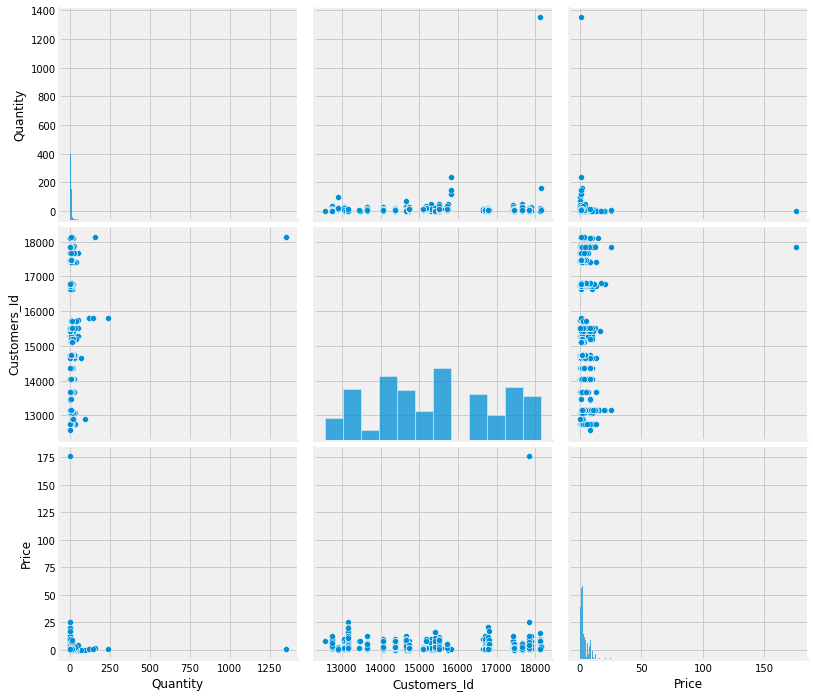

In [ ]:
sns.pairplot(Rtl_data[['Quantity' , 'Customers_Id' , 'Price']])

fig = plt.gcf()
fig.set_size_inches(12,10)

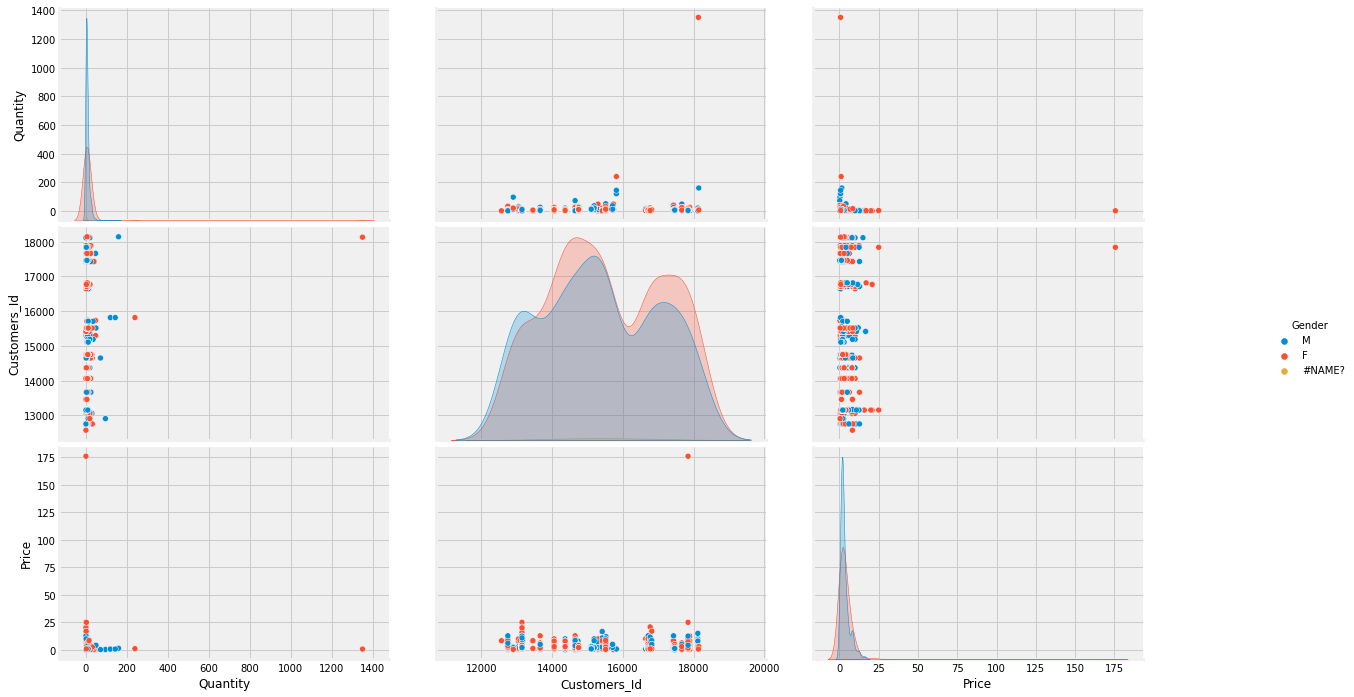

In [ ]:
sns.pairplot(Rtl_data, vars = ['Quantity' , 'Customers_Id' , 'Price'], hue='Gender')
fig = plt.gcf()
fig.set_size_inches(20,10)

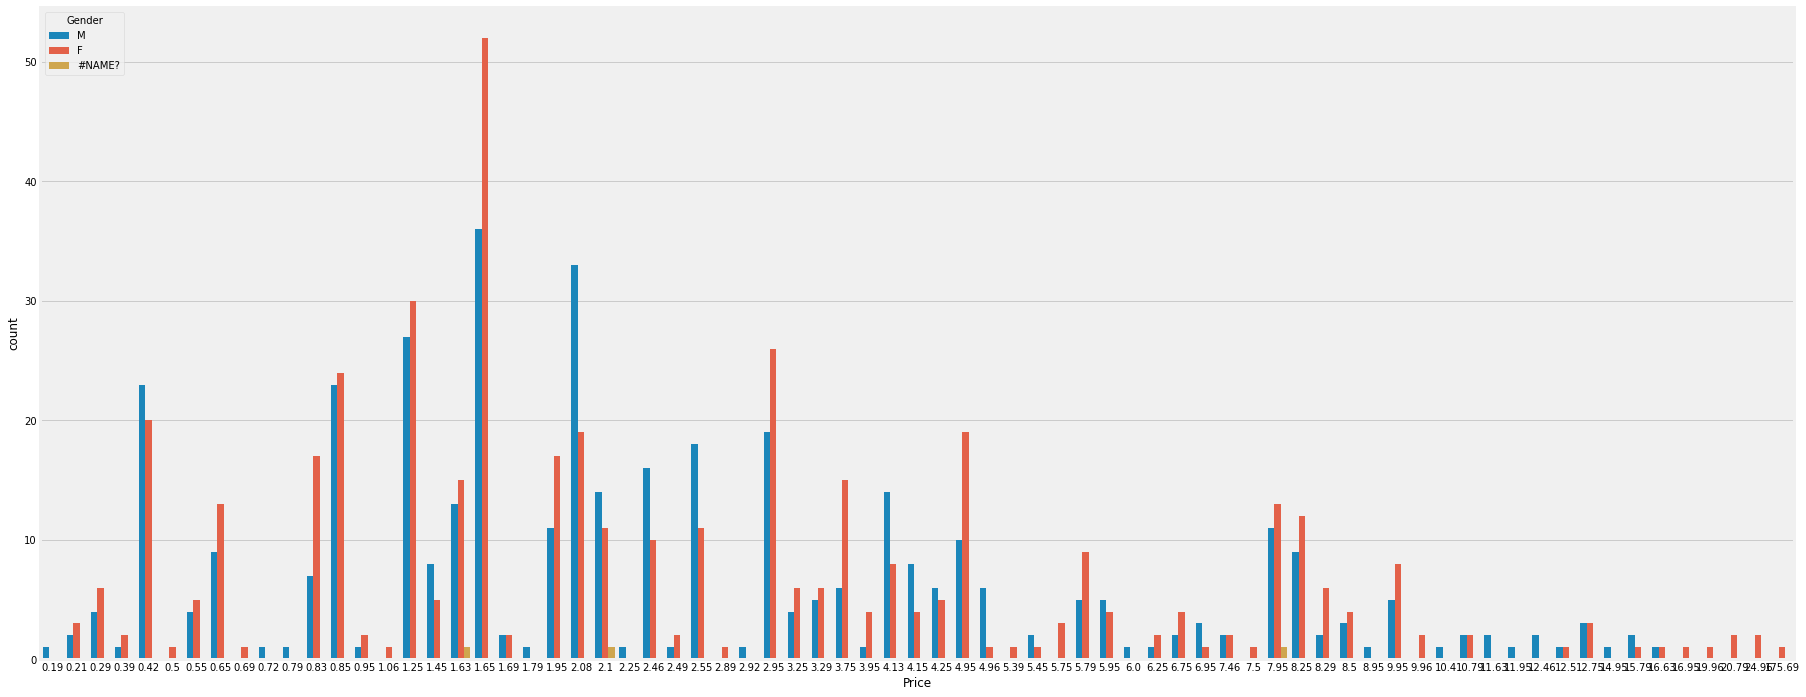

In [ ]:
plt.figure(figsize = (28,12))
ns = sns.countplot(x = 'Price' , hue = 'Gender' , data = Rtl_data)

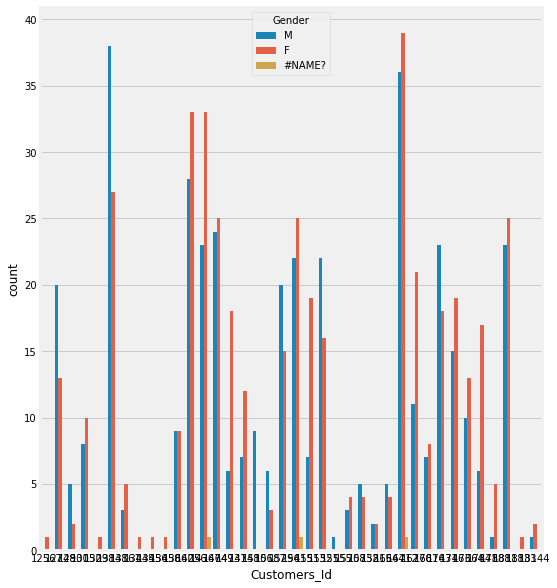

In [ ]:
plt.figure(figsize = (8,10))
ns = sns.countplot(x = 'Customers_Id' , hue = 'Gender' , data = Rtl_data)

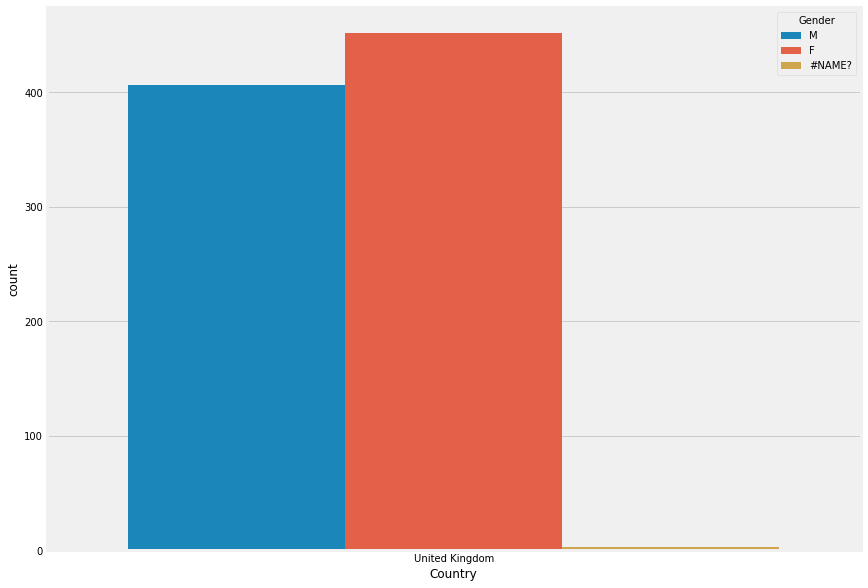

In [ ]:
plt.figure(figsize = (13,10))
ns = sns.countplot(x = 'Country' , hue = 'Gender' , data = Rtl_data)

In [ ]:
Rtl_dataset = Rtl_data[['Price' , 'TotalAmount']]

In [ ]:
Rtl_dataset.describe()

,Price,TotalAmount
count,861.000000,861.000000
mean,3.497724,14.606841
std,6.715542,37.172071
min,0.190000,0.190000
25%,1.250000,4.160000
50%,2.080000,8.290000
75%,4.150000,16.500000
max,175.690000,931.500000


Create a Clusters using K-Means 

In [ ]:
#Importing the cluster package
import sklearn.cluster as cluster

In [ ]:
K = range(1,12)
wcss = []
for k in K:
  kmeans = cluster.KMeans(n_clusters=k,init='k-means++')
  kmeans = kmeans.fit(Rtl_dataset)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K , 'WCSS' : wcss})
mycenters

,Clusters,WCSS
0,1,1.227101e+06
1,2,3.854222e+05
2,3,1.795543e+05
3,4,1.001648e+05
4,5,6.285704e+04
5,6,3.796881e+04
6,7,2.563724e+04
7,8,2.103906e+04
8,9,1.772837e+04
9,10,1.421478e+04


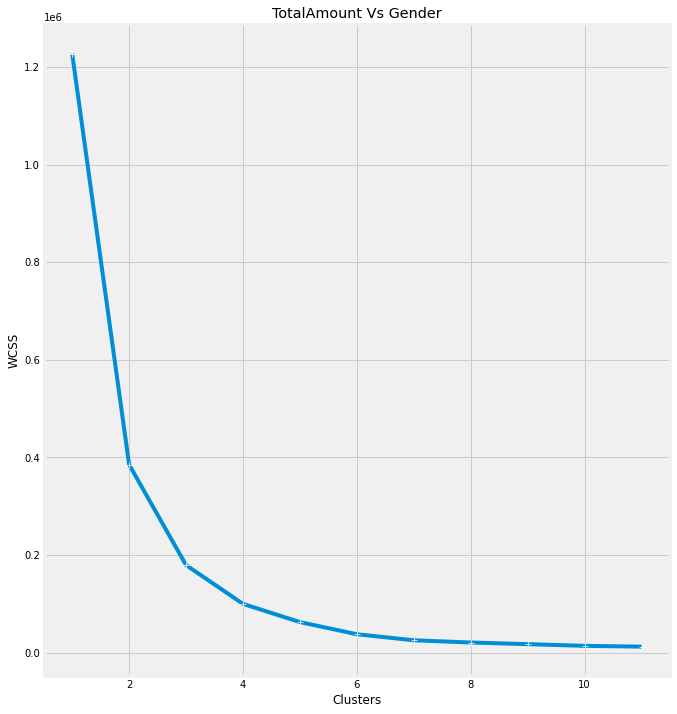

In [ ]:
sns.lineplot(x = 'Clusters' , y = 'WCSS' , data = mycenters , marker = '+')
plt.title('TotalAmount Vs Gender')

fig  = plt.gcf()
fig.set_size_inches(10,12)


In [ ]:
kmeans = cluster.KMeans(n_clusters= 20 , init = 'k-means++')
kmeans = kmeans.fit(Rtl_data[['Quantity' , 'Price']])

In [ ]:
kmeans.cluster_centers_

In [ ]:
Rtl_data.head()

,Invoice_No,Stock_Code,Description,Quantity,Date,Price,Customers_Id,Country,Gender,TotalAmount
0,552820,23144,ZINC T-LIGHT HOLDER STARS SMALL,12,2011-11-05 12:53:00,0.83,16644,United Kingdom,M,9.96
1,552820,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-11-05 12:53:00,0.65,16644,United Kingdom,M,10.40
2,552820,22917,HERB MARKER ROSEMARY,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,M,7.80
3,552820,22916,HERB MARKER THYME,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,F,7.80
4,552820,22921,HERB MARKER CHIVES,12,2011-11-05 12:53:00,0.65,16644,United Kingdom,F,7.80


Dendrogram -  output from hierarchical clustering

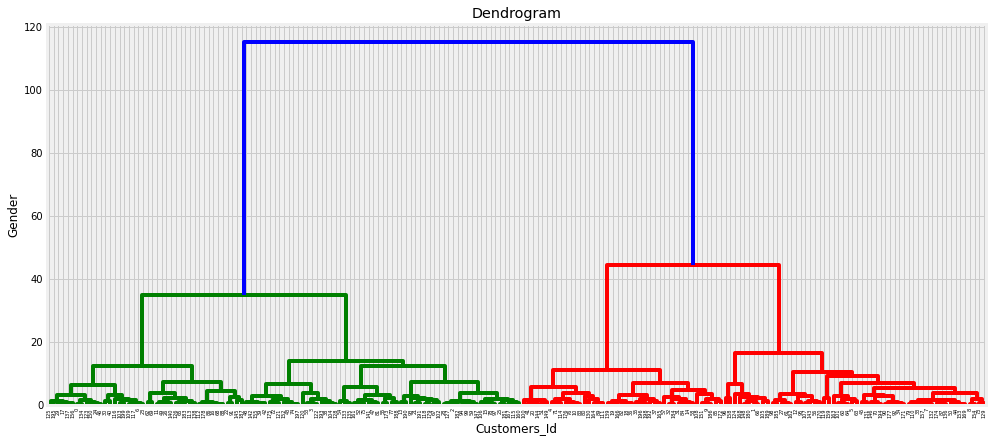

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

%matplotlib inline
df = pd.read_csv('Customers_Reviews_Segmentation.csv')
df.head(10)
df.describe()
dataset = make_blobs(n_samples= 200,
                     n_features = 2,
                     centers = 4,
                    cluster_std = 1.6,
                     random_state = 50)

X =dataset[0]
plt.figure(figsize = (15,7))
plt.title('Dendrogram')
plt.xlabel('Customers_Id')
plt.ylabel('Gender')

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()